# **Mapa Interativo - Entrada do Usuário**

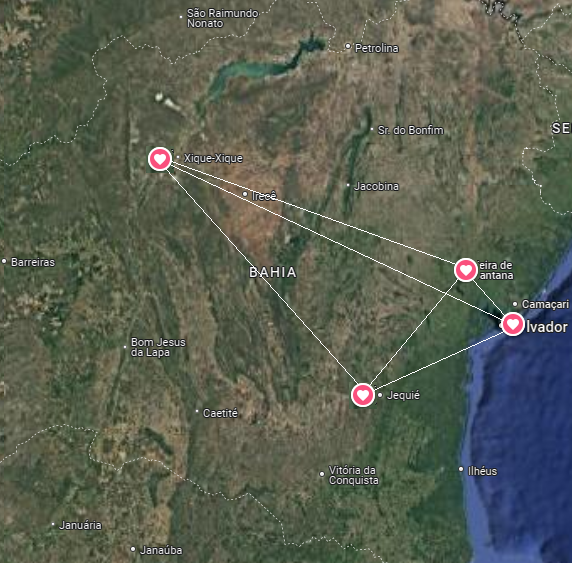

# **Saída Visual do Usuário - Melhor Caminho**

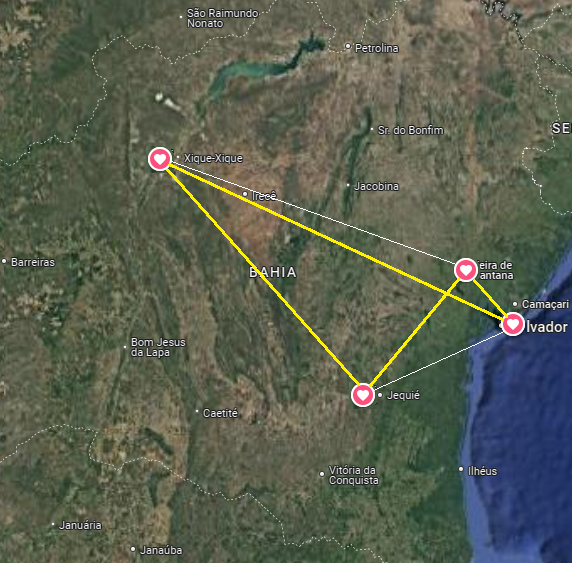

# **Importação de Pacotes**

In [ ]:
!pip install ACO-Pants # Instalação de ACO-Pants

import pants
import math
import random
import numpy

  Preparing metadata (setup.py) ... done
  Created wheel for ACO-Pants: filename=ACO_Pants-0.5.2-py3-none-any.whl size=18841 sha256=0f109bf5ba4d96fae59c6bb23ee2649c6903c4c160ee8a42650f702b0f621650
  Stored in directory: /root/.cache/pip/wheels/18/20/45/4dc8bf8059c641765ecbbaf092ec25ad79f7deaa51662a68c8
Successfully built ACO-Pants


# **Geração do Grafo de Entrada**

In [ ]:
# Função: grafo_caixeiro_viajante(numCities, minDist, maxDist)
# Parâmetros:
#   numCities: número de cities
#   minDist: menor valor de distância
#   maxDist: maior valor de distância
# Retorno:
#   cities: grafo de cidades (Matriz numCities X numCities). As distância
#   entre duas cidades são determinadas aleatoriamente entre minDist e maxDist
def grafo_caixeiro_viajante(numCities, minDist, maxDist):
  cities = numpy.zeros((numCities, numCities), dtype = int)
  for i in range(numCities):
    for j in range(numCities):
      if (j>i):
        cities[i, j] = random.randint(minDist, maxDist)
      elif (j<i):
        cities[i, j] = cities[j, i]
  return cities

while(True):
  numCities = int(input('Digite o Número de Cidades: '))
  if (numCities > 4):
    break
  else:
    print('O número de cidades deve ser maior que 4!')

cities = grafo_caixeiro_viajante(numCities, 10, 100)

# Função: dist(cid1, cid2):
# Parâmetros:
#   cid1: cidade de origem (vértice de origem)
#   cid2: cidade de destino (vértice de destino)
# Retorno:
#   dist = distância entre as cidades (custo da aresta)
def dist(cid1, cid2):
  return cities[cid1][cid2]

print('Cidades e Distâncias:')
print(cities)

Digite o Número de Cidades: 18
Cidades e Distâncias:
[[  0  74  44  55  10  42  58  17  42  37  98  93  96  14  39  70  93  99]
 [ 74   0  61  79  67  74  96  32  14  28  82  51  66  38  24  28  82  93]
 [ 44  61   0  77  51  83  55  83  44  13  47  34  84  38  37  43 100  72]
 [ 55  79  77   0  49  69  27  54  99  60  15  77  82  26  99  42  98  45]
 [ 10  67  51  49   0  27  15  20  30  87  47  54  96  77  69  80  53  38]
 [ 42  74  83  69  27   0  67  48  54  64  93  58  70  49  32  83  85  69]
 [ 58  96  55  27  15  67   0  23  75  36  86  17  61  81  81 100  36  27]
 [ 17  32  83  54  20  48  23   0  96  31  86  36  34  63  45  43  33  24]
 [ 42  14  44  99  30  54  75  96   0  79  45  63 100  26  11  62  10  49]
 [ 37  28  13  60  87  64  36  31  79   0  51  77  76  19  51  16  51  21]
 [ 98  82  47  15  47  93  86  86  45  51   0  58  78  55  75  93  71  77]
 [ 93  51  34  77  54  58  17  36  63  77  58   0  62  84  67 100  42  10]
 [ 96  66  84  82  96  70  61  34 100  76  78  

# **Execução do Algoritmo**

In [ ]:
qtd_ants = [5, 30, 50, 100, 300, 500, 1000, 3000, 5000]
solutions_distance = []

# Cabeçalho da tabela
print("{:<15} {:<65} {:<15}".format("Qtd Formigas", "Caminho", "Custo Total"))

# Divisor de Layout
print("-" * 100)

# Função para imprimir o caminho e custo para cada quantidade de formigas
def imprimir_caminho_custo(qtd_ants, numCities, dist):
    print("{:<15} {:<65} {:<15}".format(ant_number, str(solution.tour), solution.distance))

for ant_number in qtd_ants:

  nodes = list(range(numCities))

  # Cria a representação do mundo (world) a partir dos nós (nodes) e função de distância (dist)
  world = pants.World(nodes, dist)

  # Cria o Solver
  solver = pants.Solver(limit = 10, ant_count=ant_number, beta = 6, alpha=6)

  # Busca pela melhor solução (Processamento do algoritmo)
  solution = solver.solve(world)

  imprimir_caminho_custo(qtd_ants, numCities, dist)
  solutions_distance.append(solution.distance)

Qtd Formigas    Caminho                                                           Custo Total    
----------------------------------------------------------------------------------------------------
5               [2, 9, 15, 1, 8, 14, 5, 4, 0, 7, 6, 11, 17, 16, 12, 13, 3, 10]    400            
30              [3, 10, 2, 9, 15, 1, 8, 14, 5, 0, 4, 7, 17, 11, 6, 16, 12, 13]    419            
50              [2, 9, 17, 11, 6, 7, 0, 4, 5, 14, 8, 1, 15, 16, 12, 13, 3, 10]    405            
100             [2, 9, 15, 1, 8, 14, 5, 4, 0, 7, 6, 11, 17, 16, 12, 13, 3, 10]    400            
300             [9, 15, 16, 8, 1, 14, 5, 4, 0, 13, 12, 7, 17, 11, 6, 3, 10, 2]    399            
500             [4, 0, 13, 12, 16, 8, 14, 1, 15, 9, 2, 10, 3, 6, 11, 17, 7, 5]    399            
1000            [2, 9, 15, 1, 8, 14, 5, 4, 0, 13, 12, 16, 7, 17, 11, 6, 3, 10]    396            
3000            [2, 9, 15, 1, 8, 14, 5, 4, 0, 13, 12, 16, 7, 17, 11, 6, 3, 10]    396            
5000            [

# **Exibição Gráfica dos Resultados**

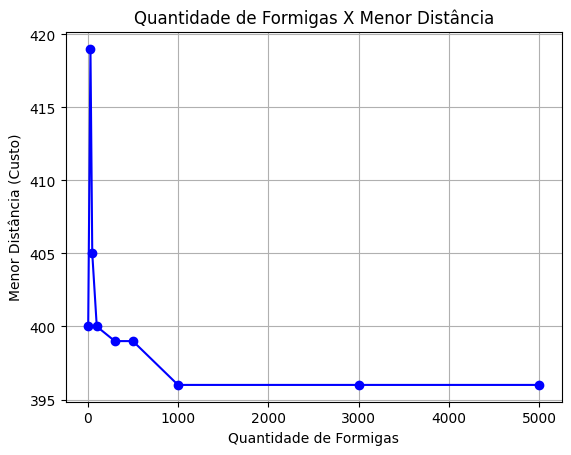

In [ ]:
import matplotlib.pyplot as plt

# Criar o gráfico
plt.plot(qtd_ants, solutions_distance, color="blue", linestyle="-", marker="o")

# Adicionar título e rótulos
plt.title("Quantidade de Formigas X Menor Distância")
plt.xlabel("Quantidade de Formigas")
plt.ylabel("Menor Distância (Custo)")

# Adicionar grade e legenda
plt.grid(True)
# plt.legend()

# Exibir o gráfico
plt.show()

# **Algoritmo de Força Bruta**

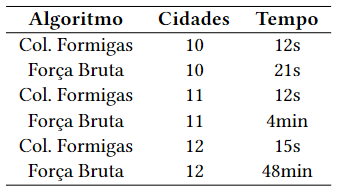

In [ ]:
from itertools import permutations

def tsp_brute_force(distances):
  cities = list(range(len(distances)))
  min_path = None
  min_cost = float('inf')

  for perm in permutations(cities):
      cost = sum(distances[perm[i]][perm[i+1]] for i in range(len(perm)-1))
      cost += distances[perm[-1]][perm[0]]  # Voltar à cidade de origem

      if cost < min_cost:
          min_cost = cost
          min_path = perm

  return min_path, min_cost

min_path, min_cost = tsp_brute_force(cities)
print(f"Solução Ótima (Menor Caminho): {min_path} ~ Custo Mínimo: {min_cost}")

# **GITHUB - INFOS**

Meu user.name no git: WilsonRamosCJ (obtive por: *!git config --global user.name*)

Caminho do repositório git: /content/colonia_formiga/ (obtive por: *%cd /content/colonia_formiga/*)


In [40]:
!git config --global user.name "WilsonRamosCJ"
!git config --global user.email "wilson.ramoscj@gmail.com"